In [1]:
!pip install scikit-learn nltk

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string


In [6]:
df = pd.read_csv("spam_dataset.csv", encoding='latin1')

In [7]:
print(df.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [8]:
print(df[['v1', 'v2']].head())


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [9]:
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
print(df.head())


  label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [10]:
df = df[['label', 'message']]
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [11]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())


   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [12]:
nltk.download('stopwords')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['processed_message'] = df['message'].apply(preprocess_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,message,processed_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [13]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['processed_message'])
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9775784753363229
Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.92      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
def predict_email(message):
    processed_message = preprocess_text(message)
    vectorized_message = vectorizer.transform([processed_message])
    prediction = model.predict(vectorized_message)[0]
    return "Spam" if prediction == 1 else "Ham"

# Contoh prediksi
test_message = "Congratulations! You've won a free ticket to Bahamas."
print(predict_email(test_message))


Spam


In [16]:
test_message = "Hi John, just wanted to confirm our meeting at 3 PM tomorrow. Let me know if there are any changes."
print(predict_email(test_message))


Ham


In [17]:
!pip install matplotlib seaborn wordcloud


<ipython-input-18-cc05afe37f14>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette="viridis")


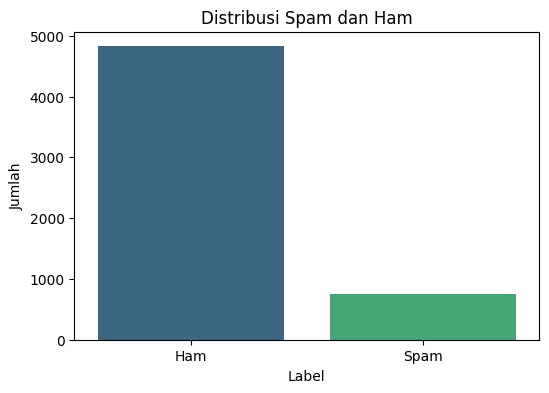

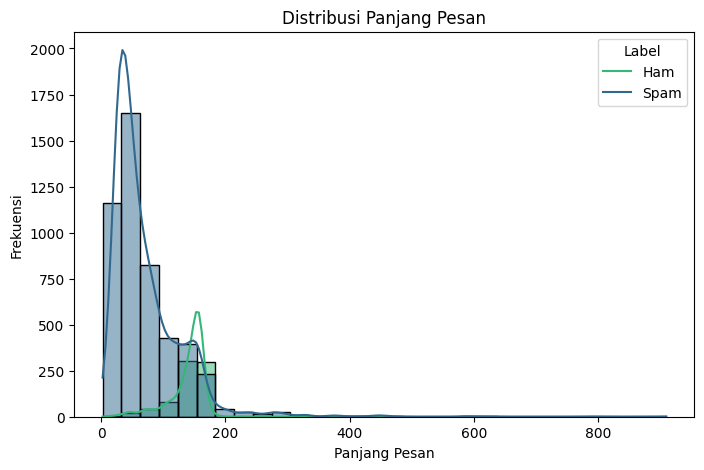

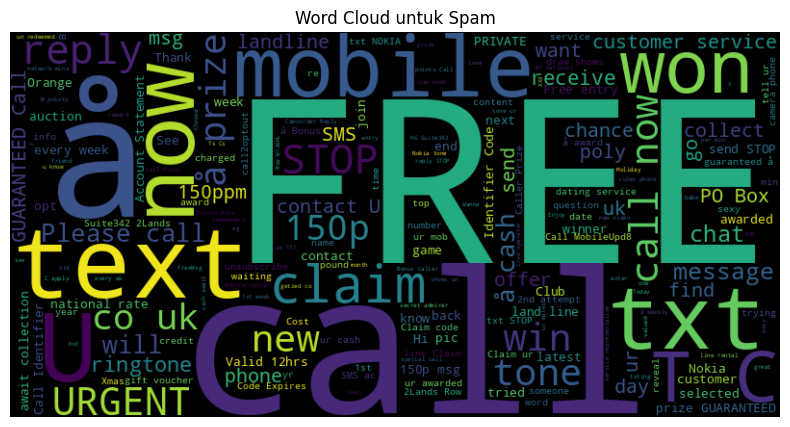

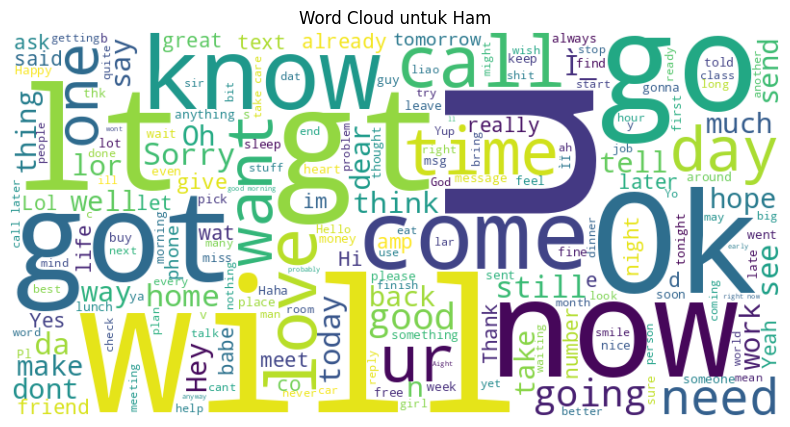

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Dataset
df = pd.read_csv("spam_dataset.csv", encoding='latin1')
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 1. Distribusi Spam dan Ham
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette="viridis")
plt.title("Distribusi Spam dan Ham")
plt.xticks([0, 1], ["Ham", "Spam"])
plt.ylabel("Jumlah")
plt.xlabel("Label")
plt.show()

# 2. Panjang Pesan
df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='message_length', hue='label', bins=30, kde=True, palette="viridis")
plt.title("Distribusi Panjang Pesan")
plt.xlabel("Panjang Pesan")
plt.ylabel("Frekuensi")
plt.legend(["Ham", "Spam"], title="Label")
plt.show()

# 3. Word Cloud
spam_words = ' '.join(df[df['label'] == 1]['message'])
ham_words = ' '.join(df[df['label'] == 0]['message'])

spam_cloud = WordCloud(width=800, height=400, background_color="black").generate(spam_words)
ham_cloud = WordCloud(width=800, height=400, background_color="white").generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud untuk Spam")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud untuk Ham")
plt.show()


In [19]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'spam_filter_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# Download files
from google.colab import files
files.download('spam_filter_model.pkl')
files.download('vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>